### Import the libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# calculate accuracy measures and confusion matrix
from sklearn import metrics
# Create KNN classifier
from sklearn.neighbors import KNeighborsClassifier

### Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

In [3]:
# Read H5 file
f = h5.File("SVHN_single_grey1.h5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)

X_test
X_train
X_val
y_test
y_train
y_val


In [4]:
list(f)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [5]:
datasetNames

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [6]:
f['X_test'].shape
f['X_train'].shape
f['X_val'].shape
f['y_test'].shape
f['y_train'].shape
f['y_val'].shape

(18000, 32, 32)

(42000, 32, 32)

(60000, 32, 32)

(18000,)

(42000,)

(60000,)

### Data fetching and understand the train/val/test splits.

In [7]:
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']

y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']

X_train.shape
y_train.shape
X_test.shape
y_test.shape
X_val.shape
y_val.shape

(42000, 32, 32)

(42000,)

(18000, 32, 32)

(18000,)

(60000, 32, 32)

(60000,)

Label 4648 is 5


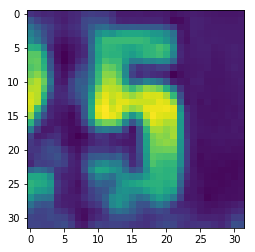

In [8]:
i = np.random.randint(1, len(X_train))
print("Label %d is" % i, y_train[i])
plt.imshow(X_train[i])

<Figure size 720x72 with 0 Axes>

(-0.5, 31.5, 31.5, -0.5)

label for each of the below image: 0


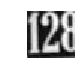

In [9]:
plt.figure(figsize=(10, 1)) #width 10, height 1

plt.subplot(1, 10, 1)
plt.imshow(X_train[0], cmap="gray")
plt.axis('off')
print('label for each of the below image: %s' % (np.argmax(y_train[0:10][1])))
plt.show()

In [10]:
# Reshape the image data from 3D to 2D by using reshape and flatten methods from numpy
X_train_reshaped = np.array([X_train[i].flatten() for i in range(0,X_train.shape[0])])
print(X_train_reshaped.shape)

(42000, 1024)


In [11]:
X_test_reshaped = np.array([X_test[i].flatten() for i in range(0,X_test.shape[0])])
print(X_test_reshaped.shape)

(18000, 1024)


### Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

In [12]:
# Train the model with KNN Classifier
kNN_model = KNeighborsClassifier(n_neighbors = 15)
kNN_model.fit(X_train_reshaped,y_train)

kNN_model.score(X_test_reshaped, y_test)

y_predict = kNN_model.predict(X_test_reshaped)

print("KNN Model Accuracy : ", metrics.accuracy_score(y_predict, y_test))
      
print("Confusion Metrics : \n", metrics.confusion_matrix(y_predict, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

0.5235555555555556

KNN Model Accuracy :  0.5235555555555556
Confusion Metrics : 
 [[1233   95  100  136  117  163  318   98  249  335]
 [  68 1335  215  251  247  164  122  227  115  137]
 [  39   70  992  136   41   62   38  116   62   70]
 [  39   83  107  734   60  268   72   84  119   92]
 [  51   75   55   50 1182   63  129   26  100   65]
 [  46   34   30  160   14  683  128   35  120  108]
 [ 113   32   37   42   54  156  741   35  253   56]
 [  37   51  138   54   17   31   23 1116   28   69]
 [  86   21   54   98   34  114  210   30  655  119]
 [ 102   32   75   58   46   64   51   41  111  753]]


### Print the classification metric report (2.5 points)

In [13]:
knn_cr=metrics.classification_report(y_test, y_predict)
print("KNN Classification report :    \n", knn_cr)

KNN Classification report :    
              precision    recall  f1-score   support

          0       0.43      0.68      0.53      1814
          1       0.46      0.73      0.57      1828
          2       0.61      0.55      0.58      1803
          3       0.44      0.43      0.43      1719
          4       0.66      0.65      0.66      1812
          5       0.50      0.39      0.44      1768
          6       0.49      0.40      0.44      1832
          7       0.71      0.62      0.66      1808
          8       0.46      0.36      0.41      1812
          9       0.56      0.42      0.48      1804

avg / total       0.53      0.52      0.52     18000



### Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

In [14]:
import tensorflow as tf

### Implement batch normalization for training the neural network (2.5 points)

In [15]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
#Reshape data from 2D to 1D -> 32X32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

### Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

In [17]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

#### Change train and test labels into one-hot vectors

In [18]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [19]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape
X_val.shape
y_val.shape

(42000, 32, 32)

(42000,)

(18000, 32, 32)

(18000,)

(60000, 32, 32)

(60000,)

In [20]:
#Train the model
model.fit(X_train, trainY, validation_data=(np.array(X_test), testY), epochs=30, batch_size=100, validation_split=0.01, shuffle='batch')

Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
42000/42000 [==============================] - 4s 106us/sample - loss: 2.1023 - acc: 0.2733 - val_loss: 1.7634 - val_acc: 0.4644
Epoch 2/30
42000/42000 [==============================] - 5s 115us/sample - loss: 1.5181 - acc: 0.5456 - val_loss: 1.3009 - val_acc: 0.6241
Epoch 3/30
42000/42000 [==============================] - 4s 106us/sample - loss: 1.2081 - acc: 0.6435 - val_loss: 1.1004 - val_acc: 0.6810
Epoch 4/30
42000/42000 [==============================] - 4s 98us/sample - loss: 1.0581 - acc: 0.6855 - val_loss: 0.9936 - val_acc: 0.7092
Epoch 5/30
42000/42000 [==============================] - 4s 99us/sample - loss: 0.9618 - acc: 0.7131 - val_loss: 0.9253 - val_acc: 0.7288
Epoch 6/30
42000/42000 [==============================] - 4s 96us/sample - loss: 0.8881 - acc: 0.7350 - val_loss: 0.8671 - val_acc: 0.7482
Epoch 7/30
42000/42000 [==============================] - 4s 102u

In [21]:
loss_and_metrics = model.evaluate(X_test, testY)
print(loss_and_metrics)

18000/18000 [==============================] - 1s 76us/sample - loss: 0.6035 - acc: 0.8327
[0.6035474868218104, 0.83272225]


In [22]:
y_predict = model.predict_classes(X_test)

In [23]:
nn_cr=metrics.classification_report(y_test, y_predict)
print("Neural Networks Classification report :    \n", nn_cr)

Neural Networks Classification report :    
              precision    recall  f1-score   support

          0       0.81      0.89      0.85      1814
          1       0.80      0.87      0.84      1828
          2       0.89      0.84      0.86      1803
          3       0.77      0.78      0.78      1719
          4       0.88      0.86      0.87      1812
          5       0.81      0.84      0.82      1768
          6       0.84      0.82      0.83      1832
          7       0.87      0.87      0.87      1808
          8       0.85      0.76      0.80      1812
          9       0.82      0.81      0.81      1804

avg / total       0.83      0.83      0.83     18000



### Observations

#### The F1-Score from KNN Classifier and Neural Network is 0.52 and 0.83 respectively. The KNN is finding the accuracy of the provided features using the distance formula, so the accuracy is less in figures.Meantime, the Neural Network is processing the provided features by adjesting weights on the Dence layers and finding more classifications. This is clearly evident from the F1-score of the NN classification report